In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
from os import listdir
import cv2
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def data_summary(main_path):
    
    yes_path = main_path+'yesreal'
    no_path = main_path+'noreal'
        
    # number of files (images) that are in the the folder named 'yes' that represent tumorous (positive) examples
    m_pos = len(listdir(yes_path))
    # number of files (images) that are in the the folder named 'no' that represent non-tumorous (negative) examples
    m_neg = len(listdir(no_path))
    # number of all examples
    m = (m_pos+m_neg)
    
    pos_prec = (m_pos* 100.0)/ m
    neg_prec = (m_neg* 100.0)/ m
    
    print(f"Number of examples: {m}")
    print(f"Percentage of positive examples: {pos_prec}%, number of pos examples: {m_pos}") 
    print(f"Percentage of negative examples: {neg_prec}%, number of neg examples: {m_neg}") 
    
augmented_data_path = '/content/drive/My Drive/trial1/augmented data1/'    
data_summary(augmented_data_path)

Number of examples: 2064
Percentage of positive examples: 52.56782945736434%, number of pos examples: 1085
Percentage of negative examples: 47.43217054263566%, number of neg examples: 979


In [4]:
print("The number of MRI images in the training set labelled 'yes':", len(os.listdir('/content/drive/My Drive/trial1/augmented data1/training/yes1')))
print("The number of MRI images in the test set labelled 'yes':", len(os.listdir('/content/drive/My Drive/trial1/augmented data1/testing/yes1')))
print("The number of MRI images in the training set labelled 'no':", len(os.listdir('/content/drive/My Drive/trial1/augmented data1/training/no1')))
print("The number of MRI images in the test set labelled 'no':", len(os.listdir('/content/drive/My Drive/trial1/augmented data1/testing/no1')))

The number of MRI images in the training set labelled 'yes': 868
The number of MRI images in the test set labelled 'yes': 217
The number of MRI images in the training set labelled 'no': 783
The number of MRI images in the test set labelled 'no': 196


In [5]:
from keras.optimizers import SGD

x = Sequential()
x.add(Conv2D(6, (5,5), data_format='channels_last', activation = 'relu', input_shape=(150,150,3)))
x.add(AveragePooling2D((2,2), 2))
x.add(Conv2D(16, (5,5), data_format='channels_last', activation = 'relu'))
x.add(AveragePooling2D((2,2), 2))
x.add(Flatten())
x.add(Dense(120, activation = 'relu'))
x.add(Dense(84, activation = 'relu'))
x.add(Dense(1, activation = 'sigmoid'))         

opt = SGD(lr=0.001, momentum=0.9)
x.compile(loss='binary_crossentropy', optimizer=opt, metrics=["acc"])

x.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 146, 146, 6)       456       
_________________________________________________________________
average_pooling2d_1 (Average (None, 73, 73, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 69, 69, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 34, 34, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               2219640   
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

In [6]:
TRAINING_DIR = "/content/drive/My Drive/trial1/augmented data1/training"
train_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=64, 
                                                    class_mode='binary', 
                                                    target_size=(150, 150))
VALIDATION_DIR = "/content/drive/My Drive/trial1/augmented data1/testing"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=64, 
                                                         class_mode='binary', 
                                                         target_size=(150, 150))

Found 1651 images belonging to 2 classes.
Found 413 images belonging to 2 classes.


In [7]:
history = x.fit(train_generator,
                              epochs=30,
                              steps_per_epoch=len(train_generator),
                              validation_steps=len(validation_generator),
                              validation_data=validation_generator)

Epoch 1/30
26/26 [==============================] - 8s 312ms/step - loss: 0.6660 - acc: 0.5627 - val_loss: 0.7163 - val_acc: 0.7191
Epoch 2/30
26/26 [==============================] - 7s 262ms/step - loss: 0.6174 - acc: 0.6972 - val_loss: 0.6957 - val_acc: 0.7070
Epoch 3/30
26/26 [==============================] - 7s 259ms/step - loss: 0.5847 - acc: 0.7123 - val_loss: 0.7119 - val_acc: 0.7191
Epoch 4/30
26/26 [==============================] - 7s 260ms/step - loss: 0.5672 - acc: 0.7147 - val_loss: 0.7055 - val_acc: 0.7264
Epoch 5/30
26/26 [==============================] - 7s 263ms/step - loss: 0.5554 - acc: 0.7317 - val_loss: 0.4437 - val_acc: 0.7361
Epoch 6/30
26/26 [==============================] - 7s 278ms/step - loss: 0.5395 - acc: 0.7486 - val_loss: 0.6847 - val_acc: 0.7579
Epoch 7/30
26/26 [==============================] - 7s 273ms/step - loss: 0.5399 - acc: 0.7299 - val_loss: 0.5055 - val_acc: 0.7288
Epoch 8/30
26/26 [==============================] - 7s 256ms/step - loss: 0.

Training Accuracy:  86.67474389076233 %
Validation Accuracy:  72.88135886192322 %
Training Loss:  0.31818693150613325
Validation Loss:  0.43904492259025574


Text(0.5, 1.0, 'Training and validation loss')

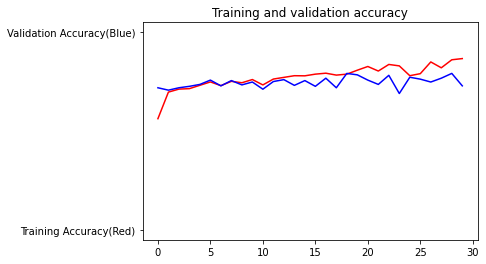

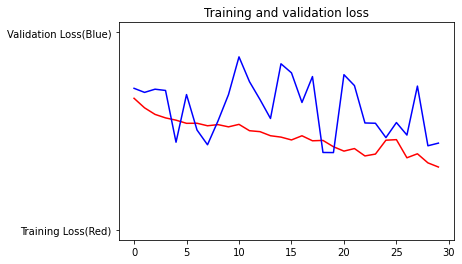

In [8]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
print("Training Accuracy: ",acc[-1]*100,"%")
print("Validation Accuracy: ",val_acc[-1]*100,"%")
print("Training Loss: ",loss[-1])
print("Validation Loss: ",val_loss[-1])
epochs=range(len(acc)) # Get number of epochs


plt.plot(epochs, acc, 'r', "Training Accuracy(Red)")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy(Blue)")
plt.title('Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss, 'r', "Training Loss(Red)")
plt.plot(epochs, val_loss, 'b', "Validation Loss(Blue)")


plt.title('Training and validation loss')